In [5]:
import numpy as np
# configure Jupyter Notebook to display matplotlib plots 
#  under the cell that created them
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import make_circles

In [9]:
# Generate a dataset with make_circles
X, y = make_circles(n_samples=1000, # Number of data points
                    noise=0.1, # Gaussian noise level of 0.1
                    factor=0.2, # Sets the size of inner circle relative to the outer circle
                    random_state=0) # Sets the seed to 0

In [10]:
X # array of points

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [11]:
X.shape # Returns the size of the array

(1000, 2)

Text(0.5, 1.0, 'Blue circles and Red crosses')

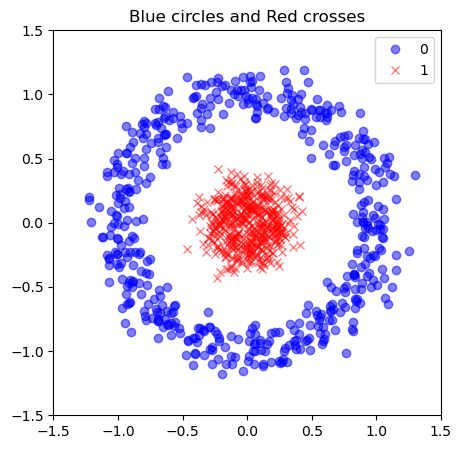

In [12]:
# Create a matplotlib figure with size 5x5
plt.figure(figsize=(5, 5))

# Plot the points of class label 0 (outer circle) as blue circles 
#  with 50% transparancy
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)

# Plot the points of class label 1 (inner circle) as red crosses 
#  with 50% transparancy
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)

# Set the x-axis limits
plt.xlim(-1.5, 1.5)

# Set the y-axis limits
plt.ylim(-1.5, 1.5)

# Add a legend 
plt.legend(['0', '1'])

# Set the title
plt.title("Blue circles and Red crosses")

In [13]:
# Import keras API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [14]:
# Create a model for sequential neural networks
model = Sequential()

In [15]:
# Add a Dense layer with 4 outputs, 
# input_shape as 2-dim vector 
# and activation function as "tanh"
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [16]:
# Add a Dense layer with 1 output,
# and activation function a "sigmoid"
model.add(Dense(1, activation='sigmoid'))

In [17]:
# Configure training process
# Set learning rate of gradient (SGD) to 0.5
# Set loss function to "binary_crossentropy"
# Add "accuracy" metrics to training statistics
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [21]:
# Start training process 
# with X as input data
# with y (class labels) as target data
# with 20 training epochs
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 973us/step - loss: 0.6721 - accuracy: 0.6350
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7870
Epoch 3/20
32/32 [==============================] - 0s 763us/step - loss: 0.4940 - accuracy: 0.8440
Epoch 4/20
32/32 [==============================] - 0s 656us/step - loss: 0.4165 - accuracy: 0.8650
Epoch 5/20
32/32 [==============================] - 0s 634us/step - loss: 0.3531 - accuracy: 0.8840
Epoch 6/20
32/32 [==============================] - 0s 713us/step - loss: 0.2793 - accuracy: 0.9190
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.9780
Epoch 8/20
32/32 [==============================] - 0s 907us/step - loss: 0.1593 - accuracy: 0.9990
Epoch 9/20
32/32 [==============================] - 0s 576us/step - loss: 0.1267 - accuracy: 1.0000
Epoch 10/20
32/32 [==============================] - 0s 669us/step - loss: 0.1044 - accuracy: 1.0000
Epo

In [22]:
# Define the range of values to cover on the x-axis and y-axis.
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)

# Create grids using meshgrid, where each point represents a coordinate (x, y).
aa, bb = np.meshgrid(hticks, vticks)

# Combine the flattened arrays of aa and bb into a single 2D array (points, 2).
# Each row represents a point with its x and y coordinates.
ab = np.c_[aa.ravel(), bb.ravel()]

# Use the trained model to predict class labels or probabilities for each point in the grid.
c = model.predict(ab)

# Reshape the predictions to match the original grid structure for visualization.
cc = c.reshape(aa.shape)

Text(0.5, 1.0, 'Blue circles and Red crosses')

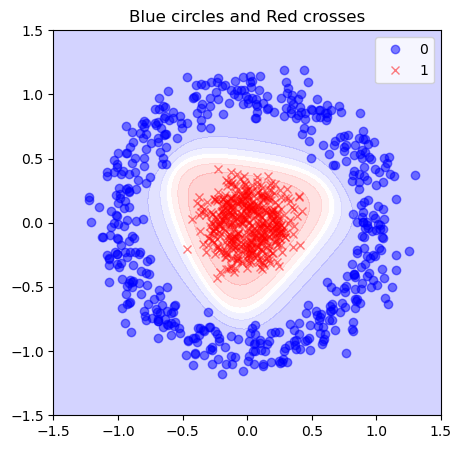

In [23]:
plt.figure(figsize=(5, 5))
# Create a contour plot using the grid and predictions
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)

# Plot the data points with different color based on the class labels
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")